In [43]:
import numpy as np
from numba import jit
import random
import matplotlib.pyplot as plt

@jit(nopython=True)
def metropolis_step(lattice, beta, J):
    """Perform one Metropolis step on the lattice."""
    N = len(lattice)
    for _ in range(N*N):
        # Choose random site
        i = random.randint(0, N-1)
        j = random.randint(0, N-1)
    
        # Calculate energy change for flip
        spin = lattice[i, j]
        neighbors = (lattice[(i+1)%N, j] + 
                    lattice[i, (j+1)%N] + 
                    lattice[(i-1)%N, j] + 
                    lattice[i, (j-1)%N])
    
        delta_E = 2 * J * spin * neighbors
    
        # Metropolis acceptance criterion
        if delta_E <= 0 or random.random() < np.exp(-beta * delta_E):
            lattice[i, j] = -spin

def run_simulation(N, T, J=1.0, steps=10000):
    """
    Run Ising model simulation.
    
    Parameters:
    -----------
    N : int
        Size of the lattice (N x N)
    T : float
        Temperature in units where k_B = 1
    J : float
        Coupling constant
    steps : int
        Number of Monte Carlo steps
    equilibration_steps : int
        Number of steps to equilibrate before measurements
        
    Returns:
    --------
    dict containing energy, magnetization, and their fluctuations
    """
    # Initialize random lattice
    lattice = np.random.choice([-1, 1], size=(N, N))
    beta = 1.0 / T
    
    # Main simulation loop with measurements
    for _ in range(steps):
        metropolis_step(lattice, beta, J)
   
    return lattice

In [117]:
# Simulate near critical temperature of 2D Ising model
N = 50  # 50x50 lattice
T_c = 2.269  # Critical temperature in units where k_B = 1
T = 2.2

mean_vals = []
n_iters = 1000
for _ in range(n_iters):
    results = run_simulation(N=N, T=T, steps=300)
    results[results ==-1] = 0
    mean_vals.append(np.mean(results))

(array([41., 36., 45., 46., 52., 53., 53., 53., 62., 53., 62., 53., 69.,
        58., 57., 50., 44., 40., 40., 33.]),
 array([0.0636 , 0.10748, 0.15136, 0.19524, 0.23912, 0.283  , 0.32688,
        0.37076, 0.41464, 0.45852, 0.5024 , 0.54628, 0.59016, 0.63404,
        0.67792, 0.7218 , 0.76568, 0.80956, 0.85344, 0.89732, 0.9412 ]),
 <BarContainer object of 20 artists>)

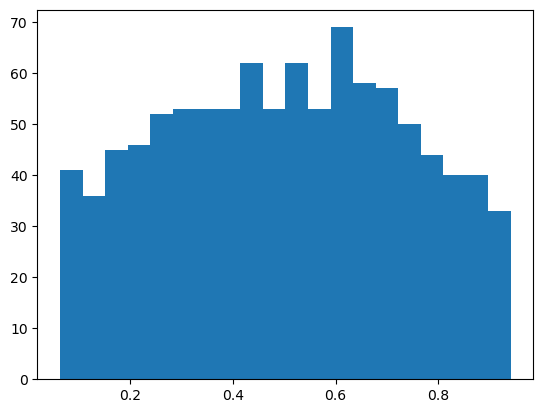

In [118]:
plt.hist(mean_vals, bins=20)

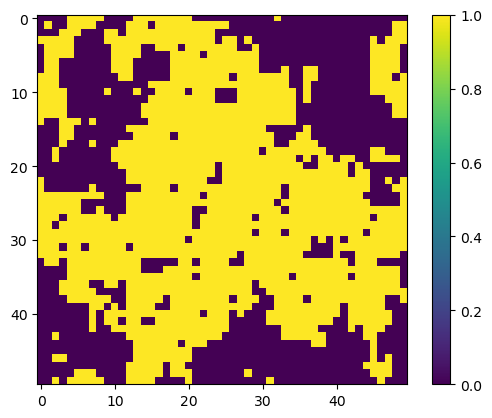

In [119]:
plt.imshow(results)
plt.colorbar()

0.5884